In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
 
wine.data
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [3]:
#实例化
#训练集带入实例化的模型去进行训练，使用的接口是fit
#使用其他接口将测试集导入我们训练好的模型，去获取我们希望过去的结果（score.Y_test）
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
 
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
 
print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
     )


Single Tree:0.7962962962962963 Random Forest:0.9444444444444444


f:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


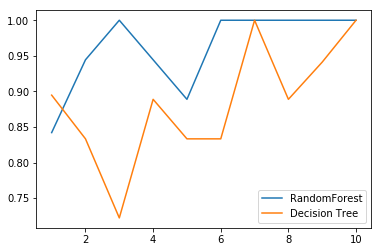

'\nlabel = "RandomForest"\nfor model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:\n    score = cross_val_score(model,wine.data,wine.target,cv=10)\n    print("{}:".format(label)),print(score.mean())\n    plt.plot(range(1,11),score,label = label)\n    plt.legend()\n    label = "DecisionTree"\n \n'

In [4]:
#目的是带大家复习一下交叉验证
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
 
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
 
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()
 
#====================一种更加有趣也更简单的写法===================#
 
"""
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"
 
"""

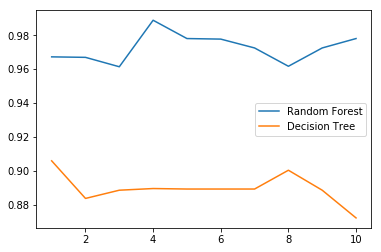

In [5]:
rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()
 
#是否有注意到，单个决策树的波动轨迹和随机森林一致？
#再次验证了我们之前提到的，单个决策树的准确率越高，随机森林的准确率也会越高

 

0.9888888888888889 32


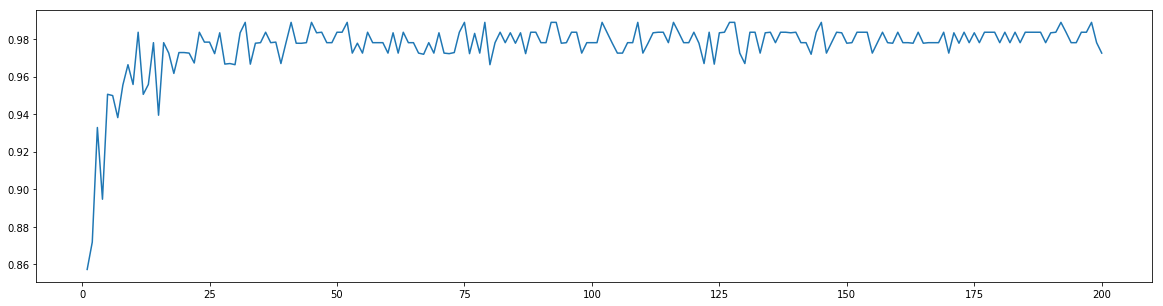

In [6]:
#####【TIME WARNING: 2mins 30 seconds】#####
 
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)#打印出：最高精确度取值，max(superpa))+1指的是森林数目的数量n_estimators
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [7]:
import numpy as np
from scipy.special import comb
 
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()


0.00036904803455582827

In [8]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
 
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state
 
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)


1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [9]:
#无需划分训练集和测试集
 
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)#默认为False
rfc = rfc.fit(wine.data,wine.target)
 
#重要属性oob_score_
rfc.oob_score_#0.9719101123595506


0.9831460674157303

In [10]:
#大家可以分别取尝试一下这些属性和接口
 
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
 
rfc.feature_importances_#结合zip可以对照特征名字查看特征重要性，参见上节决策树
rfc.apply(Xtest)#apply返回每个测试样本所在的叶子节点的索引
rfc.predict(Xtest)#predict返回每个测试样本的分类/回归结果
rfc.predict_proba(Xtest)

array([[0.88, 0.12, 0.  ],
       [0.6 , 0.4 , 0.  ],
       [0.48, 0.48, 0.04],
       [0.12, 0.24, 0.64],
       [0.92, 0.  , 0.08],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.8 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.2 , 0.64, 0.16],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.  , 0.04],
       [0.4 , 0.44, 0.16],
       [0.16, 0.84, 0.  ],
       [0.16, 0.76, 0.08],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.08, 0.88, 0.04],
       [0.08, 0.8 , 0.12],
       [0.  , 0.04, 0.96],
       [0.04, 0.2 , 0.76],
       [0.  , 0.96, 0.04],
       [0.08, 0.76, 0.16],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.32, 0.64],
       [0.12, 0.12, 0.76],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.8 , 0.04, 0.16],
       [0.08, 0.64, 0.28],
 

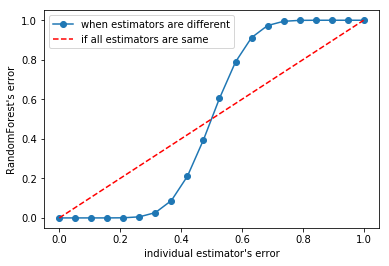

In [11]:
import numpy as np
 
x = np.linspace(0,1,20)
 
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()      
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()


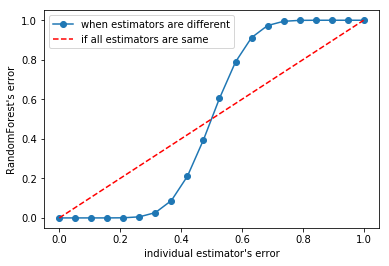

In [12]:
import numpy as np
 
x = np.linspace(0,1,20)
 
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [15]:
from sklearn.datasets import load_boston#一个标签是连续西变量的数据集
from sklearn.model_selection import cross_val_score#导入交叉验证模块
from sklearn.ensemble import RandomForestRegressor#导入随机森林回归系
 
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)#实例化
cross_val_score(regressor, boston.data, boston.target, cv=10
               ,scoring = "neg_mean_squared_error"#如果不写scoring，回归评估默认是R平方
               )


array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [16]:
#sklearn当中的模型评估指标（打分）列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())#这些指标是scoring可选择的参数

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer#填补缺失值的类
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [27]:
dataset = load_boston()
dataset#是一个字典
dataset.target#查看数据标签
dataset.data#数据的特征矩阵
dataset.data.shape#数据的结构
#总共506*13=6578个数据
 
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]#506
n_features = X_full.shape[1]#13


In [30]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
 
rng = np.random.RandomState(0)#设置一个随机种子，方便观察
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))#3289
#np.floor向下取整，返回.0格式的浮点数
 
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
 
missing_features = rng.randint(0,n_features,n_missing_samples)#randint（下限，上限，n）指在下限和上限之间取出n个整数
len(missing_features)#3289
missing_samples = rng.randint(0,n_samples,n_missing_samples)
len(missing_samples)#3289
 
#missing_samples = rng.choice(n_samples,n_missing_samples,replace=False)
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。
# 但如果我们需要的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，
# 因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中!
#这里我们不采用np.random.choice,因为我们现在采样了3289个数据，远远超过我们的样本量506，使用np.random.choice会报错
 
X_missing = X_full.copy()
y_missing = y_full.copy()
 
X_missing[missing_samples,missing_features] = np.nan
 
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如pandas来得好用
X_missing.head()

#并没有对y_missing进行缺失值填补，原因是有监督学习，不能缺标签啊



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


In [33]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')#实例化
X_missing_mean = imp_mean.fit_transform(X_missing)#特殊的接口fit_transform = 训练fit + 导出predict
#pd.DataFrame(X_missing_mean).isnull()#但是数据量大的时候还是看不全
#布尔值False = 0， True = 1 
# pd.DataFrame(X_missing_mean).isnull().sum()#如果求和为0可以彻底确认是否有NaN

#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)#constant指的是常数
X_missing_0 = imp_0.fit_transform(X_missing)

In [40]:
X_missing_reg = X_missing.copy()

#找出数据集中，缺失值从小到大排列的特征们的顺序，并且有了这些的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values#np.argsort()返回的是从小到大排序的顺序所对应的索引
 
for i in sortindex:
    
    #构建我们的新特征矩阵（没有被选中去填充的特征 + 原始的标签）和新标签（被选中去填充的特征）
    df = X_missing_reg
    fillc = df.iloc[:,i]#新标签
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)#新特征矩阵
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
                        
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]# Ytrain是被选中要填充的特征中（现在是我们的标签），存在的那些值：非空值
    Ytest = fillc[fillc.isnull()]#Ytest 是被选中要填充的特征中（现在是我们的标签），不存在的那些值：空值。注意我们需要的不是Ytest的值，需要的是Ytest所带的索引
    Xtrain = df_0[Ytrain.index,:]#在新特征矩阵上，被选出来的要填充的特征的非空值所对应的记录
    Xtest = df_0[Ytest.index,:]#在新特征矩阵上，被选出来的要填充的特征的空值所对应的记录
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)#实例化
    rfc = rfc.fit(Xtrain, Ytrain)#导入训练集进行训练
    Ypredict = rfc.predict(Xtest)#用predict接口将Xtest导入，得到我们的预测结果（回归结果），就是我们要用来填补空值的这些值
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

#检验是否有空值
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [37]:
#对所有数据进行建模，取得MSE结果
 
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
 
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)#实例化
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)

In [41]:
[*zip(['Full data','Zero Imputation','Mean Imputation','Regressor Imputation'],mse)]

[('Full data', 21.62860460743544),
 ('Zero Imputation', 40.84405476955929),
 ('Mean Imputation', 49.50657028893417),
 ('Regressor Imputation', 20.959585267967373)]

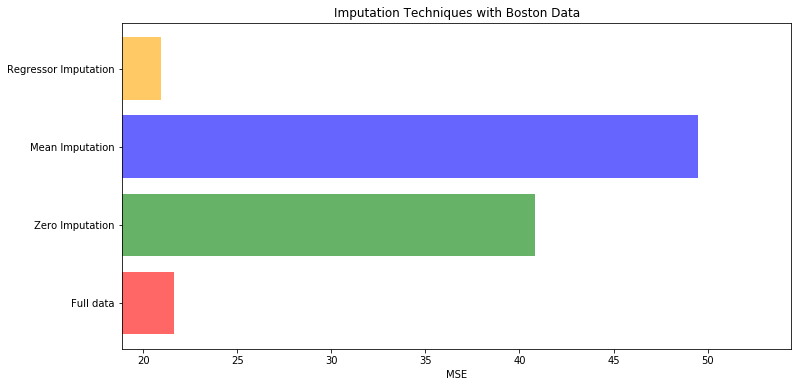

In [47]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
 
plt.figure(figsize=(12, 6))#画出画布
ax = plt.subplot(111)#添加子图
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')#bar为条形图，barh为横向条形图，alpha表示条的粗度
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)#设置x轴取值范围
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
data = load_breast_cancer()
 
data
 
data.data.shape
 
data.target
 
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [50]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()#交叉验证的分类默认scoring='accuracy'
 
score_pre
 
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以上的准确率



0.9666925935528475

0.9684480598046841 41


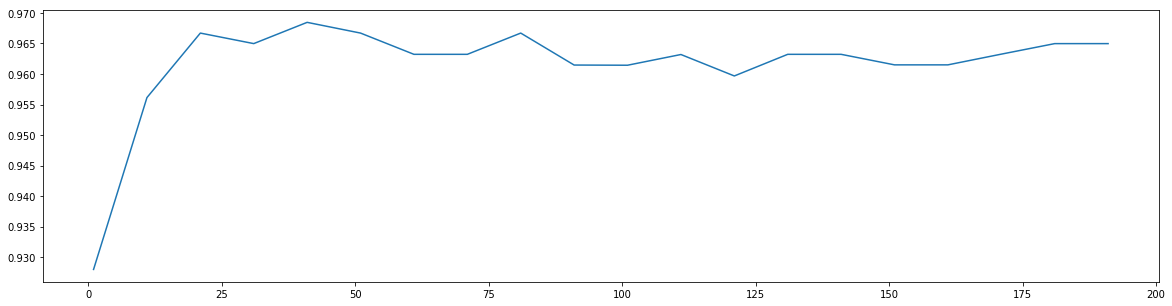

In [51]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
 
#####【TIME WARNING: 30 seconds】#####
 
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
 
#list.index([object])
#返回这个object在列表list中的索引


0.9719568317345088 39


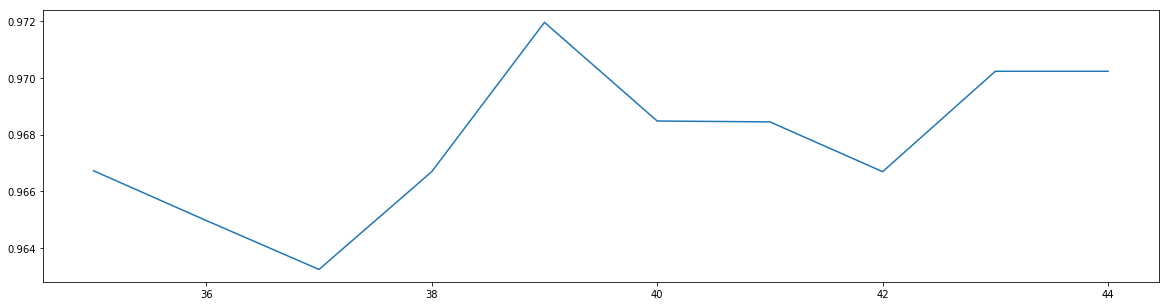

In [52]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [53]:
"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
 
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
 
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
 
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
    
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""

"\n有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势\n从曲线跑出的结果中选取一个更小的区间，再跑曲线\nparam_grid = {'n_estimators':np.arange(0, 200, 10)}\n \nparam_grid = {'max_depth':np.arange(1, 20, 1)}\n    \nparam_grid = {'max_leaf_nodes':np.arange(25,50,1)}\n    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围\n \n有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这\n样的参数我们就可以直接跑网格搜索\nparam_grid = {'criterion':['gini', 'entropy']}\n \nparam_grid = {'min_samples_split':np.arange(2, 2+20, 1)}\n \nparam_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}\n    \nparam_grid = {'max_features':np.arange(5,30,1)} \n \n"

In [54]:
#调整max_depth
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)#网格搜索
GS.fit(data.data,data.target)
 
GS.best_params_#显示调整出来的最佳参数
 
GS.best_score_#返回调整好的最佳参数对应的准确率

f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [55]:
#调整max_features
 
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""
 
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
 
"""
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_

f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [56]:
#调整min_samples_leaf
 
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
 
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_


f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [57]:
#调整min_samples_split
 
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_


f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [58]:
#调整Criterion
 
param_grid = {'criterion':['gini', 'entropy']}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_


0.9718804920913884

In [59]:
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score
 
score - score_pre


0.005264238181661218